In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
from scipy.stats import ttest_ind
from scipy import stats

In [2]:
data=pd.read_csv('data.csv')
data['Date_time']=pd.to_datetime(data['Date_time'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 41 columns):
Unnamed: 0                        119390 non-null int64
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119390 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           119390 non-null object
market_segment                    119390 no

<li> Q1: Is domestic cancellation equal to international cancellation rate? </li>
<li> Null Hypotheis= mean of cancellation rate from Portugal = mean of cancellation rate from international countries </li>
<li> Alternative Hypothesis= mean of cancellation rate from Portugal != mean of cancellation rate from international countries</li>
<li> alpha=0.05</li>

In [3]:
domestic=data[data['country']=='PRT']
international=data[data['country']!='PRT']

In [4]:
a=domestic.groupby(data['Date_time'])

In [5]:
dom_count=a['is_canceled'].value_counts().unstack()
dom_count['sum']=dom_count[0]+dom_count[1]
dom_count['rate']=dom_count[1]/dom_count['sum']

In [6]:
b=international.groupby(data['Date_time'])

In [7]:
int_count=a['is_canceled'].value_counts().unstack()
int_count['sum']=dom_count[0]+dom_count[1]
int_count['rate']=dom_count[1]/dom_count['sum']

In [8]:
list=[]
avg_mean1=[]
avg_mean2=[]
for i in range(10000):
    sample1=np.random.choice(dom_count['rate'],len(dom_count['rate']))
    sample2=np.random.choice(int_count['rate'],len(int_count['rate']))
    mean1=np.nanmean(sample1)
    avg_mean1.append(mean1)
    mean2=np.nanmean(sample2)
    avg_mean2.append(mean2)
    diff=mean1-mean2
    list.append(diff)
percentile=np.percentile(list,[2.5,97.5])
print('Domestic vs International Cancelation Rate 95% Confidence Interval:'+str(percentile))

Domestic vs International Cancelation Rate 95% Confidence Interval:[-0.02150634  0.02192998]


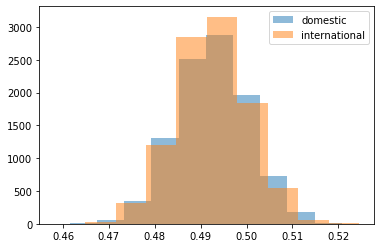

In [9]:
plt.hist(avg_mean1,alpha=0.5,label='domestic')
plt.hist(avg_mean2,alpha=0.5,label='international')
plt.legend(loc='upper right')

In [10]:
dom_count

is_canceled,0,1,sum,rate
Date_time,,,,
2015-07-01,84.0,19.0,103.0,0.184466
2015-07-02,8.0,57.0,65.0,0.876923
2015-07-03,18.0,19.0,37.0,0.513514
2015-07-04,32.0,43.0,75.0,0.573333
2015-07-05,14.0,16.0,30.0,0.533333
...,...,...,...,...
2017-08-27,31.0,20.0,51.0,0.392157
2017-08-28,89.0,25.0,114.0,0.219298
2017-08-29,21.0,18.0,39.0,0.461538


(array([   4.,   39.,  320., 1195., 2445., 2992., 1996.,  794.,  186.,
          29.]),
 array([-0.044957  , -0.0365039 , -0.0280508 , -0.0195977 , -0.0111446 ,
        -0.0026915 ,  0.00576159,  0.01421469,  0.02266779,  0.03112089,
         0.03957399]),
 <a list of 10 Patch objects>)

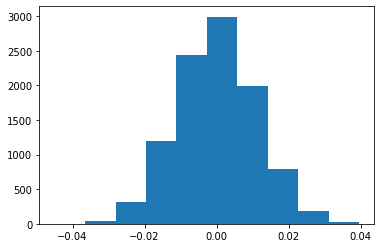

In [11]:
plt.hist(list)

In [12]:
observed_t=np.mean(dom_count['rate'])-np.mean(int_count['rate'])
list2=[]
for i in list:
    if (i>=observed_t)==True:
        list2.append(1)
p=np.sum(list2)/len(list)
p

0.4996

In [13]:
ttest_ind(int_count['rate'].dropna(),dom_count['rate'].dropna())

Ttest_indResult(statistic=0.0, pvalue=1.0)

The confidence interval is (-0.02134154,  0.02174621) which includes 0. It's inconclusive whether to accept or reject null hypothesis. 

<li> Q2: Is the correlation of cancelation rate vs temperature positive or negative? </li>
<li> Null Hypothesis: Person's correlation coefficient = 0 </li>
<li> Alternative Hypothesis: Person's correlation coefficient != 0 </li>
<li>critical value=0.05</li>

In [14]:
c=data.groupby(data['Date_time'])
counts=c['is_canceled'].value_counts()
counts

Date_time   is_canceled
2015-07-01  0              103
            1               19
2015-07-02  1               57
            0               36
2015-07-03  0               37
                          ... 
2017-08-29  1               44
2017-08-30  0               62
            1               27
2017-08-31  0               89
            1               45
Name: is_canceled, Length: 1586, dtype: int64

In [15]:
unstack=counts.unstack()
unstack

is_canceled,0,1
Date_time,,
2015-07-01,103,19
2015-07-02,36,57
2015-07-03,37,19
2015-07-04,45,43
2015-07-05,37,16
...,...,...
2017-08-27,125,49
2017-08-28,147,64
2017-08-29,81,44


In [16]:
list=[]
for i in range(793):
    sum=unstack[0][i]+unstack[1][i]
    percent=(unstack[1][i]/sum)*100
    list.append(percent)

In [17]:
d=pd.DataFrame(a['Date_time'])
d['percent']=list
d.pop(1)
d

,0,percent
0,2015-07-01,15.573770
1,2015-07-02,61.290323
2,2015-07-03,33.928571
3,2015-07-04,48.863636
4,2015-07-05,30.188679
...,...,...
788,2017-08-27,28.160920
789,2017-08-28,30.331754
790,2017-08-29,35.200000
791,2017-08-30,30.337079


In [18]:
data.head()

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,reservation_status_date,Date_time,Maximum_Temperature,Minimum _Temperature,Average_Temperature,Heat_Index,Precipitation(inches),Wind_Speed,Relative_Humidity,Conditions
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,2015-07-01,2015-07-01,74.4,63.3,67.6,68.379723,0.1,14.4,83.56,"Rain, Clear"
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,2015-07-01,2015-07-01,74.4,63.3,67.6,68.379723,0.1,14.4,83.56,"Rain, Clear"
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,2015-07-02,2015-07-01,74.4,63.3,67.6,68.379723,0.1,14.4,83.56,"Rain, Clear"
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,2015-07-02,2015-07-01,74.4,63.3,67.6,68.379723,0.1,14.4,83.56,"Rain, Clear"
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,2015-07-03,2015-07-01,74.4,63.3,67.6,68.379723,0.1,14.4,83.56,"Rain, Clear"


In [19]:
count_temp=c['Average_Temperature'].value_counts()

In [42]:
temp=[]
for i in count_temp.index:
    temp.append(i[1])
d['temperature']=temp

In [43]:
cor_list=[]
for i in range(10000):
    sample1=np.random.choice(d['percent'],len(d['percent']))
    sample2=np.random.choice(d['temperature'],len(d['temperature']))
    cor=stats.pearsonr(sample1,sample2)
    cor_list.append(cor)

In [44]:
correlation=[]
for i in cor_list:
    correlation.append(i[0])

Text(0, 0.5, 'Average Temperature')

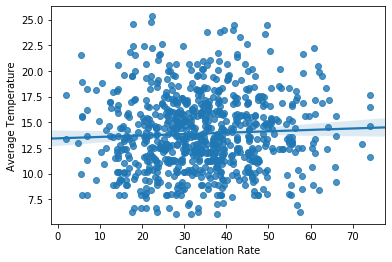

In [57]:
sns.regplot(sample1,sample2)
plt.xlabel('Cancelation Rate')
plt.ylabel('Average Temperature')

In [35]:
print('Correlation of Average Temperature and Cancelation Rate 95% Confidence Interval:'
      +str(np.percentile(correlation,[2.5,97.5])))

Correlation of Average Temperature and Cancelation Rate 95% Confidence Interval:[-0.07093038  0.07070765]


It's inconclusive whether we can reject or accpet null hypothesis since the 95% CI contains negative and positive boundry. It could be negative correlated, postive correlated, or not correlated at all. 

<li> Q3: Is the correlation of cancelation rate vs wind speed positive or negative? </li>
<li> Null Hypothesis: Person's correlation coefficient = 0 </li>
<li> Alternative Hypothesis: Person's correlation coefficient != 0 </li>
<li>critical value=0.05</li>

In [36]:
count_wind=c['Wind_Speed'].value_counts()

In [46]:
wind_speed=[]
for i in count_wind.index:
    wind_speed.append(i[1])
d['wind_speed']=wind_speed

In [53]:
cor_list2=[]
for i in range(10000):
    sample1=np.random.choice(d['percent'],len(d['percent']))
    sample2=np.random.choice(d['wind_speed'],len(d['wind_speed']))
    cor=stats.pearsonr(sample1,sample2)
    cor_list2.append(cor)

In [54]:
correlation2=[]
for i in cor_list2:
    correlation2.append(i[0])

In [55]:
p=[]
for i in cor_list2:
    p.append(i[1])
print('Correlation of Wind Speed and Cancelation Rate 95% Confidence Interval:'+
      str(np.percentile(correlation2,[2.5,97.5])))
print('p-value:'+str(np.mean(p)))

Correlation of Wind Speed and Cancelation Rate 95% Confidence Interval:[-0.06833989  0.06928068]
p-value:0.5023495037016403


Text(0, 0.5, 'Wind Speed')

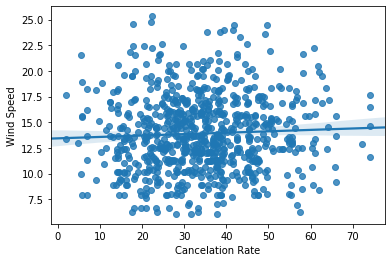

In [58]:
sns.regplot(sample1,sample2)
plt.xlabel('Cancelation Rate')
plt.ylabel('Wind Speed')

The 95% confidence interval contain negative and positive number. It's inconclusive for this test.